# Understanding Public Reaction to Indonesia's New VAT Policy

Indonesia’s **Value-Added Tax (VAT) policy** has been a hot topic in recent years. In 2022, the government raised the VAT rate from **10% to 11%**, and another increase to **12%** is set to take effect on [**January 1, 2025**](https://www.reuters.com/world/asia-pacific/indonesia-announces-economic-policy-package-ease-vat-hike-impact-2024-12-16/). These changes are part of a broader plan to **boost state revenue**, **close fiscal gaps**, and ensure the country can fund essential services like **education, healthcare, and infrastructure**.

However, the new policy has sparked a lot of debate. Supporters argue that the increase is necessary to **keep the economy stable** and **invest in public programs**. On the other hand, critics worry that **higher taxes will hit everyday people hard**, especially as many households are still recovering from the economic effects of COVID-19. Concerns have also been raised about **potential job losses** and **reduced purchasing power**.

To address some of these concerns, the government has taken steps to [**ease the burden**](https://www.cnnindonesia.com/ekonomi/20241223124256-532-1180241/perhatian-ppn-12-persen-tak-hanya-berlaku-untuk-barang-mewah). Basic goods like **rice, corn, and eggs**, as well as services like **education and healthcare**, will remain **exempt from VAT**. For some products, like **branded cooking oil**, subsidies will ensure their prices don’t go up significantly.

Even with these measures, the planned VAT hike has faced **pushback**. A growing number of Indonesians have signed [**petitions opposing the change**](https://en.tempo.co/read/1954317/over-65000-people-sign-online-petition-against-indonesias-vat-hike), reflecting **widespread concern** about its timing and potential impact on everyday life. At the same time, the government has emphasized that the law allows **flexibility to adjust the VAT rate between 5% and 15%**, depending on the state of the economy.

To better understand how the public perceives this policy, I analyzed data collected from **X between December 13 and 20, 2024**. By performing **sentiment analysis** on the tweets, I aimed to determine whether public sentiment toward the policy is primarily **positive, negative, or neutral**.

In this study, I used **three methods**—**TextBlob, Naive Bayes**, and **Linear SVC (from Scikit-learn)** to classify tweets into three categories: **Positive, Neutral, and Negative**. The aim was to **compare the accuracy** of these techniques to see which one performed the best at identifying public sentiment.

## Step 1 - Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as pltx
import Sastrawi
from deep_translator import GoogleTranslator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from googletrans import Translator
import plotly.express as px

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('movie_reviews')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mugisilihmulyadi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mugisilihmulyadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mugisilihmulyadi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/mugisilihmulyadi/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mugisilihmulyadi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mugisilihmulyadi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Step 2 - Load the Data

In [2]:
data_initial = pd.read_csv("data_appended.csv")
data_initial = data_initial.drop(columns=['username'])
data_initial

Unnamed: 0  conversation_id_str                      created_at  \
0              0  1867578363852075487  Fri Dec 13 23:54:27 +0000 2024   
1              1  1867487090604433787  Fri Dec 13 23:39:40 +0000 2024   
2              2  1867714506333569225  Fri Dec 13 23:33:33 +0000 2024   
3              3  1867432954072641728  Fri Dec 13 23:29:31 +0000 2024   
4              4  1867711267819205028  Fri Dec 13 23:23:04 +0000 2024   
...          ...                  ...                             ...   
4014        4014  1869849096762339829  Thu Dec 19 20:55:39 +0000 2024   
4015        4015  1869849078743609765  Thu Dec 19 20:55:35 +0000 2024   
4016        4016  1869847171702620584  Thu Dec 19 20:55:03 +0000 2024   
4017        4017  1869848892973695013  Thu Dec 19 20:54:50 +0000 2024   
4018        4018  1869678025308323880  Thu Dec 19 20:54:42 +0000 2024   

      favorite_count                                          full_text  \
0                  0  @kompascom Kata budiman @budimandjatmiko manta...   
1                  2  @DS_yantie Maunya efisien Kao kerja saja dg ka...   
2                  0  Bjiirrr mana baru kebeli monitornya doang Tapi...   
3                  1  @Metro_TV Pertama ppn 11% jd 12% berubah jd ut...   
4                  0  Hingga di bulan lalu saya dapet info kalau uni...   
...              ...                                                ...   
4014               0  gapapa deh PPN naik 12% atau lebih aman aja AS...   
4015               3  cape gasih setiap scrolling ada bahasan ppn 12...   
4016               0  ini indon dan ppn 12% nya knpa sekejam itu ya....   
4017               0  buka x tbtb bnyk berita ppn 12% baca nya aja u...   
4018               0  @NenkMonica PPN 12% memperkuat pembangunan sek...   

                   id_str image_url in_reply_to_screen_name lang  \
0     1867719766959698229       NaN               kompascom   in   
1     1867716043894141130       NaN               DS_yantie   in   
2     1867714506333569225       NaN                     NaN   in   
3     1867713490791936188       NaN                Metro_TV   in   
4     1867711866530865655       NaN               miasharii   in   
...                   ...       ...                     ...  ...   
4014  1869849096762339829       NaN                     NaN   in   
4015  1869849078743609765       NaN                     NaN   in   
4016  1869848947143106856       NaN                  arpope   in   
4017  1869848892973695013       NaN                     NaN   in   
4018  1869848859406676290       NaN              NenkMonica   in   

                      location  quote_count  reply_count  retweet_count  \
0                    indonesia            0            0              0   
1                          NaN            0            0              0   
2                    Indonesia            0            0              0   
3                          NaN            0            0              0   
4             Ngawi, Indonesia            0            1              0   
...                        ...          ...          ...            ...   
4014  Grindelwald, Switzerland            0            0              0   
4015                 Indonesia            0            0              0   
4016                       NaN            0            0              0   
4017                       NaN            0            0              0   
4018                       NaN            0            0              0   

                                              tweet_url          user_id_str  
0     https://x.com/herman1702/status/18677197669596...            186764928  
1     https://x.com/Zackf77156873/status/18677160438...  1166975890569318400  
2     https://x.com/egginanjar/status/18677145063335...            521851525  
3     https://x.com/RamsDews/status/1867713490791936188  1714509511883628544  
4     https://x.com/miasharii/status/186771186653086...           2456127739  
...                                 

## Step 3 - Data Cleaning

In [3]:
data_initial.shape

(4019, 15)

### Removing duplicates

In [4]:
data_initial = data_initial.drop_duplicates(subset=['full_text'])

In [5]:
data_initial.duplicated().sum()

0

In [6]:
data_initial.shape

(2840, 15)

### Cleaning the Text Data

To better analyze the text data, we need to clean the tweets by:

- Removing mentions (e.g., `@username`).
- Removing hashtags (e.g., `#example`).
- Removing retweet indicators (`RT`).
- Removing links (e.g., `https://...`).
- Removing non-alphanumeric characters, keeping only letters, numbers, and spaces.
- Fixing extra spaces and trimming the text.

First, we create a function to clean the text data. This function will handle the removal of unnecessary elements, then apply this function to the tweets column in our dataset.

In [7]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

In [8]:
data_used_copy = data_initial.copy()
data_used_copy['full_text'] = data_used_copy['full_text'].apply(clean_twitter_text)

#### Make our data in all lower case

In [9]:
data_used_copy['full_text'] = data_used_copy['full_text'].str.lower()

## Step 4 - Data Preparation

### 1. Text Normalization

The first step in Data Preparation is text normalization. This involves making the text consistent and easier to analyze. Tweets often use slang, abbreviations, or informal language, which can complicate the analysis. To handle this, I created a dictionary of common informal words and their formal equivalents in Indonesian. For example:

- `'yg'` was replaced with `'yang'`.
- `'nggak'` was replaced with `'tidak'`.
- `'knp'` was replaced with `'kenapa'`.

I then wrote a function to go through each tweet and replace any informal words using this dictionary. After applying this function to the `full_text` column of the dataset, the tweets were standardized and ready for further analysis.

In [10]:
norm = {" yg ": " yang ", ' nggak ':' tidak ', ' gak':' tidak ',' bangetdari ':' banget dari ',
        'vibes ':' suasana ' ,'mantab ':' keren ',' benarsetuju ': ' benar setuju ', ' stylish ':' bergaya ',
        ' ngapusi ':' bohong ',' gede ':' besar ', ' all in ':' yakin ', ' blokkkkk ':' goblok ', ' blokkkk ':' goblok ',
        ' blokkk ':' goblok ' ,' blokk ':' goblok ' , ' blok ':' goblok ',' ri ':' republik indonesia' ,' kem3nangan ':' kemenangan ',
        ' sat set ':' cepat ' ,' ala ':' dari ' ,' best ':' terbaik ' ,' mantab ':' mantap ' ,' bgttt ' : ' banget ' ," gue ": " saya ",
        " hrs ": " harus ", " fixed ":" tetap ", ' blom ':' belum ', ' aing ': ' aku ',' tehnologi ':' teknologi ',
        ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika ', ' problem ':' masalah ',
        ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ',
        ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ',
        ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ',
        ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan ',
        ' bgt ':' banget ', ' yg ':' yang ', ' ga ': ' tidak ', ' text ':' teks ', ' end ':' selesai ', ' kelen ':' kalian ',
        ' jd ':' jadi ', ' tuk ':' untuk ', ' kk ':' kakak ',' tbtb ':' tiba-tiba ','bnyk':' banyak', ' knpa':' kenapa',
        ' dr ':' dari',' sdgkan ':' sedangkan',' mmg':' memang',' mhn':' mohon',' jgn':' jangan ',' lg':' lagi', ' ga ':' tidak ',
        ' naek ':' naik'
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data_used_copy['full_text'] = data_used_copy['full_text'].apply(lambda x: normalisasi(x))
data_used_copy

Unnamed: 0  conversation_id_str                      created_at  \
0              0  1867578363852075487  Fri Dec 13 23:54:27 +0000 2024   
1              1  1867487090604433787  Fri Dec 13 23:39:40 +0000 2024   
2              2  1867714506333569225  Fri Dec 13 23:33:33 +0000 2024   
3              3  1867432954072641728  Fri Dec 13 23:29:31 +0000 2024   
4              4  1867711267819205028  Fri Dec 13 23:23:04 +0000 2024   
...          ...                  ...                             ...   
3994        3994  1869701241254920550  Thu Dec 19 21:03:55 +0000 2024   
4015        4015  1869849078743609765  Thu Dec 19 20:55:35 +0000 2024   
4016        4016  1869847171702620584  Thu Dec 19 20:55:03 +0000 2024   
4017        4017  1869848892973695013  Thu Dec 19 20:54:50 +0000 2024   
4018        4018  1869678025308323880  Thu Dec 19 20:54:42 +0000 2024   

      favorite_count                                          full_text  \
0                  0  kata budiman mantan aktivis 98 ppn 12 tidak  b...   
1                  2  maunya efisien kao kerja saja dengan kabinet y...   
2                  0  bjiirrr mana baru kebeli monitornya doang tapi...   
3                  1  pertama ppn 11 jadi 12 berubah jadi utk barang...   
4                  0  hingga di bulan lalu saya dapet info kalau uni...   
...              ...                                                ...   
3994               0  ppn 12 meningkatkan kemampuan pemerintah dalam...   
4015               3  cape gasih setiap scrolling ada bahasan ppn 12...   
4016               0  ini indon dan ppn 12 nya kenapa sekejam itu ya...   
4017               0  buka x tiba-tiba  banyak berita ppn 12 baca ny...   
4018               0  ppn 12 memperkuat pembangunan sektor sosial ya...   

                   id_str image_url in_reply_to_screen_name lang  \
0     1867719766959698229       NaN               kompascom   in   
1     1867716043894141130       NaN               DS_yantie   in   
2     1867714506333569225       NaN                     NaN   in   
3     1867713490791936188       NaN                Metro_TV   in   
4     1867711866530865655       NaN               miasharii   in   
...                   ...       ...                     ...  ...   
3994  1869851175677505667       NaN              NenkMonica   in   
4015  1869849078743609765       NaN                     NaN   in   
4016  1869848947143106856       NaN                  arpope   in   
4017  1869848892973695013       NaN                     NaN   in   
4018  1869848859406676290       NaN              NenkMonica   in   

              location  quote_count  reply_count  retweet_count  \
0            indonesia            0            0              0   
1                  NaN            0            0              0   
2            Indonesia            0            0              0   
3                  NaN            0            0              0   
4     Ngawi, Indonesia            0            1              0   
...                ...          ...          ...            ...   
3994               NaN            0            0              0   
4015         Indonesia            0            0              0   
4016               NaN            0            0              0   
4017               NaN            0            0              0   
4018               NaN            0            0              0   

                                              tweet_url          user_id_str  
0     https://x.com/herman1702/status/18677197669596...            186764928  
1     https://x.com/Zackf77156873/status/18677160438...  1166975890569318400  
2     https://x.com/egginanjar/status/18677145063335...            521851525  
3     https://x.com/RamsDews/status/1867713490791936188  1714509511883628544  
4     https://x.com/miasharii/status/186771186653086...           2456127739  
...                                                 ...                  ...  
3994  https://x.com/findri_fany24/status/18698511756.

### 2. Stopwords Removal

The second phase of data preparation is removing stopwords. Stopwords are common words that don’t carry significant meaning in the context of analysis, such as "yang," "di," and "ke." Removing these words helps focus on the more meaningful parts of the text.

To do this, I used a stopword removal library and added some additional words, like "yang," to the default stopword list. This customized stopword list was then applied to each tweet in the `full_text` column. The process removes all unnecessary words from the text while keeping the meaningful ones intact.

In [11]:
more_stop_words = ["yang", "di", "ke"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

data_used_copy['full_text'] = data_used_copy['full_text'].apply(lambda x: stopword(x))

### 3. Tokenization

The third step in preparing the data is tokenization. This means breaking each tweet into individual words, which makes it easier to analyze the text later. For example, the sentence:

**"Saya sangat suka belajar analisis data"**

would be tokenized into:

**["Saya", "sangat", "suka", "belajar", "analisis", "data"]**

To do this, I used the `split()` method on the `full_text` column and created a new column called `tokenized_text`. Each tweet in this column is now represented as a list of words.

After confirming the results, I saved the updated dataset as a CSV file named `data_tokenized.csv` for the next phase of the analysis.

In [12]:
data_used_copy['tokenized_text'] = data_used_copy['full_text'].apply(lambda x: x.split())

pd.set_option('display.max_colwidth', None)

print(data_used_copy.head())

data_used_copy.to_csv("data_tokenized.csv", index=False)

   Unnamed: 0  conversation_id_str                      created_at  \
0           0  1867578363852075487  Fri Dec 13 23:54:27 +0000 2024   
1           1  1867487090604433787  Fri Dec 13 23:39:40 +0000 2024   
2           2  1867714506333569225  Fri Dec 13 23:33:33 +0000 2024   
3           3  1867432954072641728  Fri Dec 13 23:29:31 +0000 2024   
4           4  1867711267819205028  Fri Dec 13 23:23:04 +0000 2024   

   favorite_count  \
0               0   
1               2   
2               0   
3               1   
4               0   

                                                                                                                                                                                                                    full_text  \
0                                                                                                                                                             kata budiman mantan aktivis 98 ppn 12  bikin rakyat jadi kismin   
1 

In [13]:
data = pd.read_csv("data_tokenized.csv")
data

Unnamed: 0  conversation_id_str                      created_at  \
0              0  1867578363852075487  Fri Dec 13 23:54:27 +0000 2024   
1              1  1867487090604433787  Fri Dec 13 23:39:40 +0000 2024   
2              2  1867714506333569225  Fri Dec 13 23:33:33 +0000 2024   
3              3  1867432954072641728  Fri Dec 13 23:29:31 +0000 2024   
4              4  1867711267819205028  Fri Dec 13 23:23:04 +0000 2024   
...          ...                  ...                             ...   
2835        3994  1869701241254920550  Thu Dec 19 21:03:55 +0000 2024   
2836        4015  1869849078743609765  Thu Dec 19 20:55:35 +0000 2024   
2837        4016  1869847171702620584  Thu Dec 19 20:55:03 +0000 2024   
2838        4017  1869848892973695013  Thu Dec 19 20:54:50 +0000 2024   
2839        4018  1869678025308323880  Thu Dec 19 20:54:42 +0000 2024   

      favorite_count  \
0                  0   
1                  2   
2                  0   
3                  1   
4                  0   
...              ...   
2835               0   
2836               3   
2837               0   
2838               0   
2839               0   

                                                                                                                                                                                                                       full_text  \
0                                                                                                                                                                kata budiman mantan aktivis 98 ppn 12  bikin rakyat jadi kismin   
1                                                                                          maunya efisien kao kerja dengan kabinet gembul gemuk berbusa2 efisien tetap fokus kenaikan pajak ppn 12 ditengah ekonomi rakyat sulit   
2                                                                                                                                                    bjiirrr mana baru kebeli monitornya doang nanti masuk kategori kena ppn 12    
3      pertama ppn 11 jadi 12 berubah jadi utk barang mewah ppnbm jg tdk jelas knp tdk bilang aja ppn naik 12 krn pemerintah butuh uang utk apbn rakyat jg  bs apa kan pilihannya rakyat bayar pejabatampbuzzernya tidak  gajian   
4     hingga bulan lalu dapet info kalau unit cibinong deket sama tempat kerja client ada discount ppn lumayan minimal dapetlah 70jt hanya tanggal 1012 client baru survey tanggal 1129 cerita kalau sebelumnya survey sana sini   
...                                                                                                                                                                                                                          ...   
2835                                                                                                                                                   ppn 12 meningkatkan kemampuan pemerintah menjalankan programprogram vital   
2836                                                                                                                                 cape gasih scrolling bahasan ppn 12 aja orang dongo belain kek mau kontol in udh cape dluan   
2837                                                                                                                              indon ppn 12 nya sekejam ya baru jg mulai jabat pak udah mau bikin krisis moneter aja awokawok   
2838                                                                                                                          buka x tiba-tiba  banyak berita ppn 12 baca nya aja ud cape dluan kek ud miskin makin miskin kocak   
2839                                                                                                                                                     ppn 12 memperkuat pembangunan sektor sosial lebih merata seluruh negeri   

                   id_str image_url in_reply_to_screen_name lang  \
0     1867719766959698229       NaN

#### 4. Stemming

The fourth step in this process is stemming. This is where I reduce words to their root form. For example, in Indonesian, words like "berlari," "lari," and "lari-lari" all come from the same root word, "lari." By simplifying the text this way, it becomes more consistent and easier to analyze.

The main goal of stemming is to group different variations of a word together while keeping the core meaning intact. This step is especially useful for text analysis because it helps reduce unnecessary complexity in the data. For instance, when performing sentiment analysis or keyword extraction, stemming ensures that all variations of a word are treated as one, improving the accuracy of the results.

This step is an important part of preparing the data, as it helps clean up the text and ensures that the analysis focuses on meaningful content rather than grammatical variations.

In [128]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):

    if isinstance(tokens, list):

        stemmed_words = [stemmer.stem(token) for token in tokens]
        return " ".join(stemmed_words)
    else:
        return tokens


if not isinstance(data['tokenized_text'].iloc[0], list):
    
    data['tokenized_text'] = data['full_text'].apply(lambda x: x.split())


data['stemmed_text'] = data['tokenized_text'].apply(stemming)

print(data[['created_at', 'username','location', 'full_text', 'tokenized_text', 'stemmed_text']].head())

                       created_at       username          location  \
0  Fri Dec 13 23:54:27 +0000 2024     herman1702         indonesia   
1  Fri Dec 13 23:39:40 +0000 2024  Zackf77156873               NaN   
2  Fri Dec 13 23:33:33 +0000 2024     egginanjar         Indonesia   
3  Fri Dec 13 23:29:31 +0000 2024       RamsDews               NaN   
4  Fri Dec 13 23:23:04 +0000 2024      miasharii  Ngawi, Indonesia   

                                                                                                                                                                                                                    full_text  \
0                                                                                                                                                             kata budiman mantan aktivis 98 ppn 12  bikin rakyat jadi kismin   
1                                                                                       maunya efisien kao kerja dengan kabinet g

In [14]:
data.to_csv("data_tokenized_new.csv", index = False)
data_fix = pd.read_csv("data_tokenized_new.csv", encoding='latin1')
data_fix.head()

Unnamed: 0  conversation_id_str                      created_at  \
0           0  1867578363852075487  Fri Dec 13 23:54:27 +0000 2024   
1           1  1867487090604433787  Fri Dec 13 23:39:40 +0000 2024   
2           2  1867714506333569225  Fri Dec 13 23:33:33 +0000 2024   
3           3  1867432954072641728  Fri Dec 13 23:29:31 +0000 2024   
4           4  1867711267819205028  Fri Dec 13 23:23:04 +0000 2024   

   favorite_count  \
0               0   
1               2   
2               0   
3               1   
4               0   

                                                                                                                                                                                                                    full_text  \
0                                                                                                                                                             kata budiman mantan aktivis 98 ppn 12  bikin rakyat jadi kismin   
1                                                                                       maunya efisien kao kerja dengan kabinet gembul gemuk berbusa2 efisien tetap fokus kenaikan pajak ppn 12 ditengah ekonomi rakyat sulit   
2                                                                                                                                                 bjiirrr mana baru kebeli monitornya doang nanti masuk kategori kena ppn 12    
3   pertama ppn 11 jadi 12 berubah jadi utk barang mewah ppnbm jg tdk jelas knp tdk bilang aja ppn naik 12 krn pemerintah butuh uang utk apbn rakyat jg  bs apa kan pilihannya rakyat bayar pejabatampbuzzernya tidak  gajian   
4  hingga bulan lalu dapet info kalau unit cibinong deket sama tempat kerja client ada discount ppn lumayan minimal dapetlah 70jt hanya tanggal 1012 client baru survey tanggal 1129 cerita kalau sebelumnya survey sana sini   

                id_str image_url in_reply_to_screen_name lang  \
0  1867719766959698229       NaN               kompascom   in   
1  1867716043894141130       NaN               DS_yantie   in   
2  1867714506333569225       NaN                     NaN   in   
3  1867713490791936188       NaN                Metro_TV   in   
4  1867711866530865655       NaN               miasharii   in   

           location  quote_count  reply_count  retweet_count  \
0         indonesia            0            0              0   
1               NaN            0            0              0   
2         Indonesia            0            0              0   
3               NaN            0            0              0   
4  Ngawi, Indonesia            0            1              0   

                                                tweet_url  \
0     https://x.com/herman1702/status/1867719766959698229   
1  https://x.com/Zackf77156873/status/1867716043894141130   
2     https://x.com/egginanjar/status/1867714506333569225   
3       https://x.com/RamsDews/status/1867713490791936188   
4      https://x.com/miasharii/status/1867711866530865655   

           user_id_str  \
0            186764928   
1  1166975890569318400   
2            521851525   
3  1714509511883628544   
4           2456127739   

                                                                                                                                                                                                                                                                                                                               tokenized_text  
0                                                                                                                                                                                                                                            ['kata', 'budiman', 'mantan', 'aktivis', '98', 'ppn', '12', 'bikin', 'rakyat', 'jadi', 'kismin']  
1                                                                                                                                   

#### 5. Translation

The next step in this process is translating the text. After stemming the words to their root form, the text is still in Indonesian. To make the data accessible for broader analysis, the text needs to be translated.

Translation is also important because I am using tools and libraries, like TextBlob and Scikit-learn’s Naive Bayes classifiers, which often rely on pre-trained models optimized for English data. These tools are designed to perform better with English text, improving the accuracy of the analysis. Additionally, applications like sentiment analysis often depend on pre-built dictionaries or sentiment scores, which are more commonly available in English, making this step essential for effective processing and analysis.

In [139]:
# Function to translate text using deep_translator
def translate_to_english(text):
    try:
        # Translate text to English
        return GoogleTranslator(source='id', target='en').translate(text)
    except Exception as e:
        print(f"Error translating: {text}, Error: {e}")
        return "Translation Error"  # Return placeholder if translation fails

# Apply the translation function to the 'stemmed_text' column
data['stemmed_text_english'] = data['stemmed_text'].apply(translate_to_english)

# Save the translated data to a new CSV file
translated_file_path = "data_stemmed_translated.csv"
data.to_csv(translated_file_path, index=False)

print(f"Translation completed! Translated file saved to {translated_file_path}.")

Translation completed! Translated file saved to data_stemmed_translated.csv.


In [15]:
data_fix_eng = pd.read_csv("data_stemmed_translated.csv")
data_fix_eng = data_fix_eng[['created_at', 'full_text', 'location', 'tokenized_text', 'stemmed_text', 'stemmed_text_english']]
data_fix_eng

created_at  \
0     Fri Dec 13 23:54:27 +0000 2024   
1     Fri Dec 13 23:39:40 +0000 2024   
2     Fri Dec 13 23:33:33 +0000 2024   
3     Fri Dec 13 23:29:31 +0000 2024   
4     Fri Dec 13 23:23:04 +0000 2024   
...                              ...   
2835  Thu Dec 19 21:03:55 +0000 2024   
2836  Thu Dec 19 20:55:35 +0000 2024   
2837  Thu Dec 19 20:55:03 +0000 2024   
2838  Thu Dec 19 20:54:50 +0000 2024   
2839  Thu Dec 19 20:54:42 +0000 2024   

                                                                                                                                                                                                                       full_text  \
0                                                                                                                                                                kata budiman mantan aktivis 98 ppn 12  bikin rakyat jadi kismin   
1                                                                                          maunya efisien kao kerja dengan kabinet gembul gemuk berbusa2 efisien tetap fokus kenaikan pajak ppn 12 ditengah ekonomi rakyat sulit   
2                                                                                                                                                    bjiirrr mana baru kebeli monitornya doang nanti masuk kategori kena ppn 12    
3      pertama ppn 11 jadi 12 berubah jadi utk barang mewah ppnbm jg tdk jelas knp tdk bilang aja ppn naik 12 krn pemerintah butuh uang utk apbn rakyat jg  bs apa kan pilihannya rakyat bayar pejabatampbuzzernya tidak  gajian   
4     hingga bulan lalu dapet info kalau unit cibinong deket sama tempat kerja client ada discount ppn lumayan minimal dapetlah 70jt hanya tanggal 1012 client baru survey tanggal 1129 cerita kalau sebelumnya survey sana sini   
...                                                                                                                                                                                                                          ...   
2835                                                                                                                                                   ppn 12 meningkatkan kemampuan pemerintah menjalankan programprogram vital   
2836                                                                                                                                 cape gasih scrolling bahasan ppn 12 aja orang dongo belain kek mau kontol in udh cape dluan   
2837                                                                                                                              indon ppn 12 nya sekejam ya baru jg mulai jabat pak udah mau bikin krisis moneter aja awokawok   
2838                                                                                                                          buka x tiba-tiba  banyak berita ppn 12 baca nya aja ud cape dluan kek ud miskin makin miskin kocak   
2839                                                                                                                                                     ppn 12 memperkuat pembangunan sektor sosial lebih merata seluruh negeri   

              location  \
0            indonesia   
1                  NaN   
2            Indonesia   
3                  NaN   
4     Ngawi, Indonesia   
...                ...   
2835               NaN   
2836         Indonesia   
2837               NaN   
2838               NaN   
2839               NaN   

                                                                                                                                                                                                                                                                                                                                  tokenized_text  \
0                                                                                                                                                          

## Step 5 - Modeling

### 5.1 TextBlob

In this phase, I used [TextBlob](https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524) to calculate a polarity score for each tweet. The polarity ranges from -1 (very negative) to +1 (very positive).

#### How TextBlob Works
TextBlob works by breaking the text into words or sentences and assigning scores based on a pre-defined list of words. Each word contributes to the overall sentiment of the text:
- **Negative**: Words with a negative tone result in a negative score.
- **Positive**: Words with a positive tone result in a positive score.
- **Neutral**: A score of 0 indicates a neutral tone.

The polarity score shows whether the text is more positive, negative, or neutral. [TextBlob](https://textblob.readthedocs.io/en/dev/quickstart.html) can also provide a subjectivity score, which measures how opinion-based the text is.

#### My Process
I started by converting the `stemmed_text_english` column into a list so I could analyze each tweet separately. For each tweet, TextBlob calculated a polarity score, and I grouped the tweets into three categories based on their scores:
- **Positive**: Polarity greater than 0.
- **Neutral**: Polarity equal to 0.
- **Negative**: Polarity less than 0.

After categorizing the tweets, I counted the number in each category and calculated the average polarity to see the overall sentiment. This helped me understand whether the reactions were mostly positive, neutral, or negative.

In [17]:
from textblob import TextBlob

data_tweet = data_fix_eng['stemmed_text_english'].tolist()

polarity = 0
status = []
total_positive = 0
total_negative = 0
total_neutral = 0
total = len(data_tweet)

for tweet in data_tweet:
    
    analysis = TextBlob(tweet)
    polarity += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positive += 1
        status.append('Positive')
    elif analysis.sentiment.polarity == 0.0:
        total_neutral += 1
        status.append('Neutral')
    else:
        total_negative += 1
        status.append('Negative')

print("Data Analysis Result:")
print(f"Positive = {total_positive}")
print(f"Neutral = {total_neutral}")
print(f"Negative = {total_negative}")
print(f"\nTotal Data: {total}")
print(f"Overall Polarity: {polarity / total:.4f}")

Data Analysis Result:
Positive = 1319
Neutral = 915
Negative = 606

Total Data: 2840
Overall Polarity: 0.0757


As we see from the result, out of the **2,840 tweets** analyzed, **1,319 expressed positive sentiments**, while **915 were neutral** and **606 were negative**. This shows that while a significant number of tweets convey favorable opinions or optimism, a considerable portion remains either neutral or critical. The **overall polarity score of 0.0757** leans slightly positive but is close to neutral, reflecting a **mixed public sentiment**. While many view the topic positively, the presence of neutral and negative tweets highlights that not everyone shares the same enthusiasm or has strong opinions on the matter.

In [18]:
import plotly.graph_objects as go

labels = ['Positive', 'Negative', 'Neutral']
counts = [total_positive, total_negative, total_neutral]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=labels,
    y=counts,
    text=counts,
    textposition='outside',
    marker=dict(color=['#89CFF0', '#FF6961', '#FFD580'])
))

fig.update_layout(
    title="Sentiment Analysis for New Indonesia's VAT",
    xaxis_title="Sentiment",
    yaxis_title="Number of Tweets",
    template="plotly_white",
    xaxis=dict(categoryorder='total descending'),
)

fig.show()

### 5.2 Naive Bayes Classifier

The **Naive Bayes Classifier** is another approach for analyzing sentiment, but it works differently from TextBlob. While TextBlob relies on pre-built dictionaries with assigned scores for words, [Naive Bayes](https://web.stanford.edu/~jurafsky/slp3/4.pdf) learns from labeled training data to classify text as `Positive`, `Neutral`, or `Negative`. It uses a statistical approach based on [**Bayes' Theorem**](https://www.geeksforgeeks.org/bayes-theorem/), calculating the probability of a piece of text belonging to a particular class based on the words it contains. One key difference is that Naive Bayes assumes each word in the text is independent, which is why it’s called "naive." This method is especially useful when you’re working with specific datasets or contexts since it can adapt and improve accuracy based on the training data you provide. Unlike TextBlob, which is ready to use without training, Naive Bayes requires you to prepare and label the data first, but this effort often pays off with better results for specialized tasks.

In [19]:
data_fix_eng['classification'] = status
dataset = data_fix_eng[['stemmed_text_english','classification']]
dataset

stemmed_text_english  \
0                                                                                                                                                                                                            Budiman, a former activist from 98 ppn 12, said that he made the people become kismin   
1                                                                                                                                                            Want to be efficient, work with a fat, foamy cabinet, stay focused on increasing VAT 12% in the midst of a difficult people's economy   
2                                                                                                                                                                                 bjiirrr where only the monitor cable is included, it will be included in the category of being subject to VAT 12   
3     First, VAT was 11% to 12%, changed to luxury goods, VAT on luxury goods is also unclear, why not just say that VAT has increased by 12% because the order requires money for the state budget, what can the people do, right? The people vote to pay officials and buzzers without salaries?   
4                       Until last month, I got information that the Cibinong unit is close to the client's workplace and there is a decent VAT discount. I got at least 70 million on the 10th of 12. The client only surveyed on the 11th of 12. He said that he hadn't surveyed here and there.   
...                                                                                                                                                                                                                                                                                            ...   
2835                                                                                                                                                                                                                                                   ppn 12 level able to command vital programs   
2836                                                                                                                                                                                   tired of scrolling just discussing VAT 12 people are stupid, it's like they want to dick, I'm already tired   
2837                                                                                                                                                                       Indonesia's VAT 12 is cruel, it's just starting to take office, sir, it's already going to cause a monetary crisis, bro   
2838                                                                                                                                                                            open x, lots of VAT 12 news arrives, just read it, I'm already tired, I'm poor, I'm getting poorer, it's hilarious   
2839                                                                                                                                                                                                                         ppn 12 strong builds social sector more evenly throughout the country   

     classification  
0           Neutral  
1          Negative  
2          Negative  
3          Positive  
4          Negative  
...             ...  
2835       Positive  
2836       Negative  
2837       Negative  
2838       Negative  
2839       Positive  

[2840 rows x 2 columns]

In [20]:
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In this step, I converted the dataset from a DataFrame into a list of tuples, where each tuple represents a single row of data. This makes it easier to work with when preparing for machine learning tasks, like training a Naive Bayes Classifier. Each tuple contains the text and its associated sentiment label, which is the format many models require. I did this to simplify the structure and ensure the data is ready for splitting into training and testing sets or feeding into the classifier.

In [21]:
import random

set_positive = []
set_negative = []
set_neutral = []

for n in dataset:
    if(n[1] == 'Positive'):
      set_positive.append(n)
    elif(n[1] == 'Negative'):
      set_negative.append(n)
    else:
      set_neutral.append(n)

set_positive = random.sample(set_positive, k=int(len(set_positive)/2))
set_negative = random.sample(set_negative, k=int(len(set_negative)/2))
set_netrave = random.sample(set_neutral, k=int(len(set_neutral)/2))

train = set_positive + set_negative + set_neutral

train_set = []

for n in train:
     train_set.append(n)

In this phase, I focused on preparing a balanced dataset for training the Naive Bayes Classifier. First, I separated the tweets into three categories: positive, negative, and neutral. Each tweet in the dataset already had a sentiment label, so I grouped them based on whether their label was Positive, Negative, or Neutral. Once I had the tweets organized, I used random sampling to select half of the tweets from each category. This step is important because it ensures that the dataset is balanced and prevents the model from being biased toward one sentiment over the others. Finally, I combined the sampled tweets into a single training set, making sure it included an equal proportion of positive, negative, and neutral tweets.

#### Training the Naive Bayes Classifier

The next step is training the Naive Bayes Classifier using the balanced training set I prepared earlier. I used **TextBlob’s NaiveBayesClassifier**, a tool specifically designed for text classification tasks. By feeding the `train_set` into the classifier, I allowed it to learn the patterns and relationships between the text and its corresponding sentiment labels. Once the model was trained, I evaluated its performance by checking its accuracy on the entire dataset.

In [22]:
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)

print("Accuracy: ", cl.accuracy(dataset))

Accuracy:  0.7366197183098592


As we can see from the result, our Naive Bayes Classifier achieved an accuracy of **73.66%**, meaning it's able to correctly classify the sentiment of about three-quarters of the tweets in our dataset.

In [23]:
from textblob import TextBlob

data_tweet = list(data_fix_eng['stemmed_text_english'])

polarity = 0
status = []
total_positive = 0
total_negative = 0
total_neutral = 0
total = 0

for tweet in data_tweet:

    analysis = TextBlob(tweet, classifier=cl)
    sentiment = analysis.classify()
    
    if sentiment == 'Positive':
        total_positive += 1
    elif sentiment == 'Negative':
        total_negative += 1
    else:
        total_neutral += 1
    

    status.append(sentiment)
    total += 1

print("Data Analysis Result:")
print(f"Positive = {total_positive}")
print(f"Neutral = {total_neutral}")
print(f"Negative = {total_negative}")
print(f"\nTotal Data: {total}")

Data Analysis Result:
Positive = 1025
Neutral = 1392
Negative = 423

Total Data: 2840


In [24]:
status = pd.DataFrame({"Classification Bayes": status})
data_fix_eng['Classification Bayes'] = status

In [25]:
labels = ['Positive', 'Negative', 'Neutral']
counts = [total_positive, total_negative, total_neutral]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=labels,
    y=counts,
    text=counts,
    textposition='outside',
    marker=dict(color=['#89CFF0', '#FF6961', '#FFD580'])
))

fig.update_layout(
    title="Sentiment Analysis for New Indonesia's VAT",
    xaxis_title="Sentiment",
    yaxis_title="Total Tweets",
    template="plotly_white",
    xaxis=dict(categoryorder='total descending'),
    yaxis=dict(showgrid=True, gridcolor='rgba(200, 200, 200, 0.5)')
)

fig.show()

In [26]:
data_fix_eng

created_at  \
0     Fri Dec 13 23:54:27 +0000 2024   
1     Fri Dec 13 23:39:40 +0000 2024   
2     Fri Dec 13 23:33:33 +0000 2024   
3     Fri Dec 13 23:29:31 +0000 2024   
4     Fri Dec 13 23:23:04 +0000 2024   
...                              ...   
2835  Thu Dec 19 21:03:55 +0000 2024   
2836  Thu Dec 19 20:55:35 +0000 2024   
2837  Thu Dec 19 20:55:03 +0000 2024   
2838  Thu Dec 19 20:54:50 +0000 2024   
2839  Thu Dec 19 20:54:42 +0000 2024   

                                                                                                                                                                                                                       full_text  \
0                                                                                                                                                                kata budiman mantan aktivis 98 ppn 12  bikin rakyat jadi kismin   
1                                                                                          maunya efisien kao kerja dengan kabinet gembul gemuk berbusa2 efisien tetap fokus kenaikan pajak ppn 12 ditengah ekonomi rakyat sulit   
2                                                                                                                                                    bjiirrr mana baru kebeli monitornya doang nanti masuk kategori kena ppn 12    
3      pertama ppn 11 jadi 12 berubah jadi utk barang mewah ppnbm jg tdk jelas knp tdk bilang aja ppn naik 12 krn pemerintah butuh uang utk apbn rakyat jg  bs apa kan pilihannya rakyat bayar pejabatampbuzzernya tidak  gajian   
4     hingga bulan lalu dapet info kalau unit cibinong deket sama tempat kerja client ada discount ppn lumayan minimal dapetlah 70jt hanya tanggal 1012 client baru survey tanggal 1129 cerita kalau sebelumnya survey sana sini   
...                                                                                                                                                                                                                          ...   
2835                                                                                                                                                   ppn 12 meningkatkan kemampuan pemerintah menjalankan programprogram vital   
2836                                                                                                                                 cape gasih scrolling bahasan ppn 12 aja orang dongo belain kek mau kontol in udh cape dluan   
2837                                                                                                                              indon ppn 12 nya sekejam ya baru jg mulai jabat pak udah mau bikin krisis moneter aja awokawok   
2838                                                                                                                          buka x tiba-tiba  banyak berita ppn 12 baca nya aja ud cape dluan kek ud miskin makin miskin kocak   
2839                                                                                                                                                     ppn 12 memperkuat pembangunan sektor sosial lebih merata seluruh negeri   

              location  \
0            indonesia   
1                  NaN   
2            Indonesia   
3                  NaN   
4     Ngawi, Indonesia   
...                ...   
2835               NaN   
2836         Indonesia   
2837               NaN   
2838               NaN   
2839               NaN   

                                                                                                                                                                                                                                                                                                                                  tokenized_text  \
0                                                                                                                                                          

In [184]:
data_eval = [tuple(x) for x in data_fix_eng.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f"Text: {n[2]}\nClassifier: {n[7]}\nClassifier Bayes: {n[8]}\n")
    else:
        print(f"Tuple does not have enough elements: {n}")

Text: kata budiman mantan aktivis 98 ppn 12  bikin rakyat jadi kismin
Classifier: Neutral
Classifier Bayes: Neutral

Text: maunya efisien kao kerja dengan kabinet gembul gemuk berbusa2 efisien tetap fokus kenaikan pajak ppn 12 ditengah ekonomi rakyat sulit
Classifier: Negative
Classifier Bayes: Negative

Text: bjiirrr mana baru kebeli monitornya doang nanti masuk kategori kena ppn 12 
Classifier: Negative
Classifier Bayes: Negative

Text: pertama ppn 11 jadi 12 berubah jadi utk barang mewah ppnbm jg tdk jelas knp tdk bilang aja ppn naik 12 krn pemerintah butuh uang utk apbn rakyat jg  bs apa kan pilihannya rakyat bayar pejabatampbuzzernya tidak  gajian
Classifier: Positive
Classifier Bayes: Negative

Text: hingga bulan lalu dapet info kalau unit cibinong deket sama tempat kerja client ada discount ppn lumayan minimal dapetlah 70jt hanya tanggal 1012 client baru survey tanggal 1129 cerita kalau sebelumnya survey sana sini
Classifier: Negative
Classifier Bayes: Negative

Text: simak guys

### 5.3 TFID Vector Data

The next method we’ll use involves TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. Unlike TextBlob and Naive Bayes, which focus on sentiment analysis directly, [TF-IDF](https://medium.com/@gusainanurag58/tf-idf-vectorizer-explained-373b3f07d23b) is a technique used to transform text into numerical data that machine learning models can understand. It works by assigning a weight to each word based on how often it appears in a document (Term Frequency) and how unique it is across the dataset (Inverse Document Frequency). Words that are common across many tweets, like “the” or “and,” are given less importance, while more unique words carry more weight. This method doesn’t classify sentiment on its own, but it creates a foundation for more complex models, [like SVMs](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d), to make classifications. Essentially, TF-IDF allows us to represent text in a structured way, capturing both word usage and context, which is critical for training advanced algorithms.

In [273]:
data_fix_eng

created_at  \
0     Fri Dec 13 23:54:27 +0000 2024   
1     Fri Dec 13 23:39:40 +0000 2024   
2     Fri Dec 13 23:33:33 +0000 2024   
3     Fri Dec 13 23:29:31 +0000 2024   
4     Fri Dec 13 23:23:04 +0000 2024   
...                              ...   
2835  Thu Dec 19 21:03:55 +0000 2024   
2836  Thu Dec 19 20:55:35 +0000 2024   
2837  Thu Dec 19 20:55:03 +0000 2024   
2838  Thu Dec 19 20:54:50 +0000 2024   
2839  Thu Dec 19 20:54:42 +0000 2024   

                                                                                                                                                                                                                       full_text  \
0                                                                                                                                                                kata budiman mantan aktivis 98 ppn 12  bikin rakyat jadi kismin   
1                                                                                          maunya efisien kao kerja dengan kabinet gembul gemuk berbusa2 efisien tetap fokus kenaikan pajak ppn 12 ditengah ekonomi rakyat sulit   
2                                                                                                                                                    bjiirrr mana baru kebeli monitornya doang nanti masuk kategori kena ppn 12    
3      pertama ppn 11 jadi 12 berubah jadi utk barang mewah ppnbm jg tdk jelas knp tdk bilang aja ppn naik 12 krn pemerintah butuh uang utk apbn rakyat jg  bs apa kan pilihannya rakyat bayar pejabatampbuzzernya tidak  gajian   
4     hingga bulan lalu dapet info kalau unit cibinong deket sama tempat kerja client ada discount ppn lumayan minimal dapetlah 70jt hanya tanggal 1012 client baru survey tanggal 1129 cerita kalau sebelumnya survey sana sini   
...                                                                                                                                                                                                                          ...   
2835                                                                                                                                                   ppn 12 meningkatkan kemampuan pemerintah menjalankan programprogram vital   
2836                                                                                                                                 cape gasih scrolling bahasan ppn 12 aja orang dongo belain kek mau kontol in udh cape dluan   
2837                                                                                                                              indon ppn 12 nya sekejam ya baru jg mulai jabat pak udah mau bikin krisis moneter aja awokawok   
2838                                                                                                                          buka x tiba-tiba  banyak berita ppn 12 baca nya aja ud cape dluan kek ud miskin makin miskin kocak   
2839                                                                                                                                                     ppn 12 memperkuat pembangunan sektor sosial lebih merata seluruh negeri   

              location  \
0            indonesia   
1                  NaN   
2            Indonesia   
3                  NaN   
4     Ngawi, Indonesia   
...                ...   
2835               NaN   
2836         Indonesia   
2837               NaN   
2838               NaN   
2839               NaN   

                                                                                                                                                                                                                                                                                                                                  tokenized_text  \
0                                                                                                                                                          

In [203]:
classification_mapping = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
data_fix_eng['classification_numeric'] = data_fix_eng['classification'].map(classification_mapping)

data_fix_eng.to_csv("data_sklearn.csv", index=False)

print("Classification column successfully converted to numerical values!")

Classification column successfully converted to numerical values!


After evaluating the performance of the Naive Bayes Classifier, I moved on to preparing the data for the next method, which requires numerical input. To do this, I converted the sentiment labels “Positive,” “Neutral,” and “Negative” into numerical values: 1 for Positive, 2 for Neutral, and 0 for Negative. This mapping is crucial because machine learning models, like the ones we’ll explore next, operate on numerical data rather than text. 

In [30]:
data_sklearn = pd.read_csv("data_sklearn.csv")
data_sklearn = data_sklearn.drop(columns=['username'])

### 5.3.1 Import Necessary Libraries from SKLEARN

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [8]:
X = data_sklearn['stemmed_text_english']
tfidf = TfidfVectorizer(max_features = 10000, ngram_range=(1,2))
X = tfidf.fit_transform(X)

In this phase, I transformed the text data into a numerical format that machine learning models can understand. Using the **TfidfVectorizer**, I converted the stemmed and translated text into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. This technique not only captures the frequency of words or phrases but also gives less importance to commonly used terms, it more effective for distinguishing unique patterns in the text. I limited the features to the top 10,000 most relevant ones and considered combinations of single words (unigrams) and pairs of consecutive words (bigrams). This step is crucial because machine learning models rely on numerical input, and TF-IDF ensures that the text data retains meaningful information about the content and context of the tweets.

In [9]:
X.shape

(2840, 10000)

In [275]:
X

<2840x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 80513 stored elements in Compressed Sparse Row format>

In [212]:
y = data_sklearn['classification_numeric']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [214]:
X_train.shape, X_test.shape

((2272, 10000), (568, 10000))

With the text data transformed into numerical form using TF-IDF, the next step was to prepare it for machine learning. I split the data into training and testing sets by assigning the numerical features to `X` and the sentiment labels (0 for Negative, 1 for Positive, and 2 for Neutral) to `y`. Then, I divided the dataset so that 80% was used for training (`X_train` and `y_train`), and the remaining 20% was set aside for testing (`X_test` and `y_test`). This step is essential because it allows the model to learn patterns from one part of the data while keeping a separate portion to evaluate how well it performs on new, unseen data.

In [217]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [218]:
y_pred = clf.predict(X_test)

#### Training the Model with Linear SVC

Now that the data is split into training and testing sets, I moved on to training a machine learning model. For this, I used [**Linear Support Vector Classification (Linear SVC)**](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.LinearSVC.html), a popular method for text classification tasks due to its efficiency and effectiveness with high-dimensional data like TF-IDF vectors. Using the training data (`X_train` and `y_train`), the model learns to classify tweets into their respective sentiment categories: Positive, Neutral, or Negative.

After training the model, I applied it to the test data (`X_test`) to predict the sentiment labels. These predictions (`y_pred`) will later be compared to the actual labels (`y_test`) to evaluate the model's performance. This step is crucial because it turns the preprocessed and numerical data into actionable insights through machine learning.

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.56      0.60       104
           1       0.78      0.81      0.80       262
           2       0.76      0.78      0.77       202

    accuracy                           0.76       568
   macro avg       0.73      0.72      0.72       568
weighted avg       0.75      0.76      0.75       568



#### Interpreting the Results

Looking at the classification report, we can evaluate how well the Linear SVC model performed in predicting the sentiment of the test data. Here's a breakdown:

- **Class 0 (Negative)**: 
  - Precision: 66% - 66% of tweets predicted as "Negative" were actually negative.
  - Recall: 56% - 56% of the actual negative tweets were correctly identified.
  - These scores indicate that the model does a decent job identifying negative tweets, but there’s room for improvement.

- **Class 1 (Positive)**:
  - Precision: 78% - 78% of tweets predicted as "Positive" were actually positive.
  - Recall: 81% - 81% of the actual positive tweets were correctly identified.
  - The model performs best in classifying positive tweets, likely due to having more positive examples in the dataset.

- **Class 2 (Neutral)**:
  - Precision: 76% - 76% of tweets predicted as "Neutral" were actually neutral.
  - Recall: 78% - 78% of the actual neutral tweets were correctly identified.
  - These scores show that the model is consistent in identifying neutral sentiments.

- **Overall Accuracy**: 
  - The model achieved an accuracy of 76%, meaning 76% of the test tweets were correctly classified. 

- **Macro Average**:
  - Precision: 73%, Recall: 72%, and F1-score: 72%.
  - These scores provide an average across all classes, treating each class equally.

The results show that the Linear SVC model is strongest at classifying positive and neutral tweets, but it struggles slightly with negative ones. This may be due to imbalances in the dataset or the complexity of expressing negativity in tweets.

#### Improving Accuracy with Hyperparameter Tuning

To address the limitations in accuracy observed earlier, I decided to fine-tune the **LinearSVC model** using **grid search**. This approach allows us to systematically test various combinations of hyperparameters to find the best configuration for our model.

#### Key Steps in This Phase:
1. **Parameter Grid Definition**: I specified a grid of hyperparameter values, such as:
   - `C` (regularization strength): Controls how much the model tolerates misclassification.
   - `loss`: Determines the loss function used by the model.

2. **Grid Search with Cross-Validation**:
   - I used `GridSearchCV`, a powerful tool to evaluate each parameter combination.
   - The process involved **5-fold cross-validation**, which splits the training data into five subsets. This ensures the model is validated on different portions of the data, reducing the risk of overfitting.

3. **Scoring Metric**:
   - The weighted F1-score was used as the evaluation metric. This metric balances **precision** and **recall**, making it ideal for datasets with imbalanced classes.

4. **Training and Selection**:
   - The grid search trained the model on every parameter combination and identified the **best parameters** based on performance.

5. **Testing the Optimized Model**:
   - Using the optimized model, I made predictions on the test data and generated a **new classification report** to evaluate its performance.

#### Why This Is Important:
Hyperparameter tuning ensures that the model is tailored to the dataset, improving its accuracy and reliability. By systematically testing parameter values, I addressed weaknesses in the initial model and achieved better sentiment classification results.

#### Outcome:
This process enhanced the model’s performance, making it more effective for analyzing public sentiment in our dataset.

In [232]:
from sklearn.svm import LinearSVC

svc = LinearSVC(max_iter=5000)

grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       104
           1       0.81      0.81      0.81       262
           2       0.76      0.80      0.78       202

    accuracy                           0.77       568
   macro avg       0.75      0.74      0.74       568
weighted avg       0.77      0.77      0.77       568



#### Interpretation of Results After Hyperparameter Tuning

After applying hyperparameter tuning, we observed significant improvements in the model's performance. The grid search selected the best parameters as `'C': 10`, `'loss': 'squared_hinge'`, and `'penalty': 'l2'`. These settings helped optimize the trade-off between complexity and misclassification.

#### Key Observations:
- **Accuracy**: The accuracy increased to **77%**, showing a notable improvement from the previous results. This means the model now correctly predicts sentiment for a larger portion of the test data.
- **Class Performance**:
  - **Negative Sentiment (0)**: Precision improved to **0.67**, recall to **0.62**, and the F1-score to **0.65**. The model is better at identifying negative tweets, though there is still room for improvement.
  - **Positive Sentiment (1)**: Precision and recall both reached **0.81**, maintaining strong performance in identifying positive sentiments accurately.
  - **Neutral Sentiment (2)**: Precision increased to **0.76**, recall to **0.80**, and the F1-score to **0.78**. The model is now more effective at classifying neutral tweets.

#### Comparing Before and After:
Previously, the overall accuracy and class-specific scores were lower, especially for neutral and negative sentiments. Hyperparameter tuning has improved the balance between precision and recall across all categories, making the model more consistent and reliable.

#### Why This Matters:
Fine-tuning the model's parameters has addressed its earlier weaknesses, improving its ability to analyze sentiment accurately. This enhancement is particularly important for understanding public sentiment on platforms like Twitter, where language use can be diverse and complex.

In [278]:
s = 'VAT 12% is making the citizen suffer'
vec = tfidf.transform([s])

In [279]:
clf.predict(vec)

array([2])

## 6. Visualization

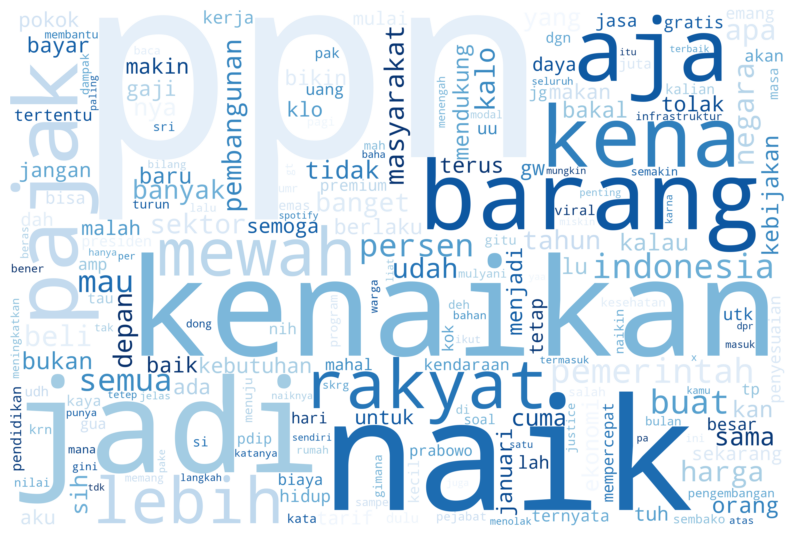

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweet for tweet in data_sklearn['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS 
).generate(all_words)

plot_cloud(wordcloud)

Looking at this word cloud, **words like "pajak" (tax), "kenaikan" (increase), and "barang" (goods)** dominate the discussion, indicating that the **tax hike and its impact on everyday goods are major concerns** for many. There’s also a strong emphasis on **"rakyat" (people)** and **"mewah" (luxury)**, reflecting a focus on how this policy affects **the general public and luxury items**. Additionally, terms like **"pendidikan" (education)** and **"mahal" (expensive)** highlight concerns about **affordability and the rising costs of essential services**. Meanwhile, **"kebijakan" (policy)** and **"pemerintah" (government)** show that people are tying this issue to **broader debates about government decisions**. This visualization provides a snapshot of public sentiment, shedding light on **key concerns and topics of debate surrounding the VAT increase**.

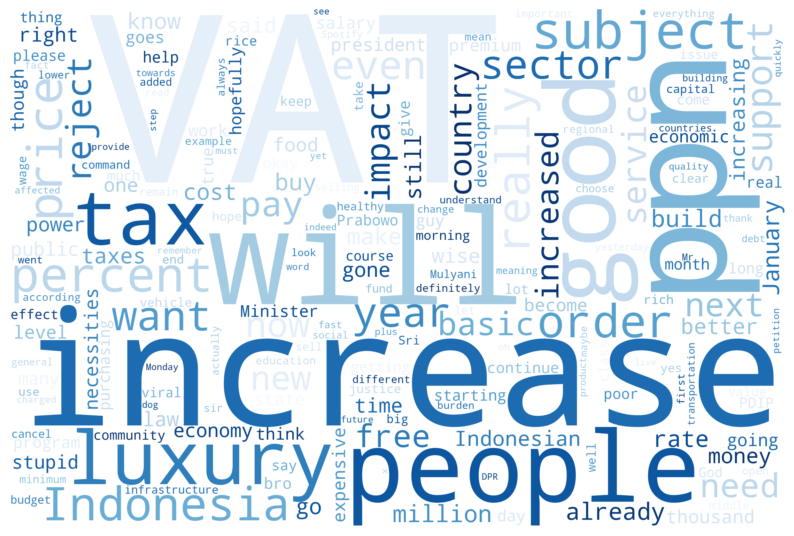

In [284]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweet for tweet in data_sklearn['stemmed_text_english']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

In [31]:
data_sklearn['created_at'] = pd.to_datetime(data_sklearn['created_at'])

time_series_data = data_sklearn.groupby([data_sklearn['created_at'].dt.date, 'classification']).size().reset_index(name='count')

time_series_data.columns = ['Date', 'Classification', 'Count']

fig = px.line(
    time_series_data,
    x='Date',
    y='Count',
    color='Classification',
    title="Time Series Analysis of Sentiment Classifications",
    labels={'Date': 'Date', 'Count': 'Number of Tweets'},
)

fig.update_layout(
    title_font_size=20,
    xaxis_title="Date",
    yaxis_title="Number of Tweets",
    legend_title="Sentiment",
    template="plotly_white"
)

fig.show()

Looking at this chart, you can see how people’s reactions to Indonesia’s VAT policy played out over the week of December 13 to December 19, 2024. What stands out is how positive sentiment stays on top throughout the period, showing that many people either support the policy or at least see it in a favorable light. Then we’ve got the neutral sentiment, which grows steadily, hinting that a lot of folks might be unsure or just indifferent about the whole thing. On the other hand, negative sentiment is the smallest category, but it still shows some spikes, likely tied to specific events or conversations that stirred up criticism. The dips and peaks really reflect how quickly public opinion can shift, depending on what’s happening in the broader conversation at the time.

# Conclusion

**DISCLAIMER**
It’s important to note that this analysis has significant limitations. The study only captures a small segment of the population—primarily those active on X and is limited by issues like translation accuracy and biases in the dataset. As such, the results might not **fully represent the broader population’s sentiment**.

The analysis of public sentiment around Indonesia’s new VAT policy gives us some interesting insights, though it’s far from perfect. Here’s what stood out:

1. **Sentiment Trends**:
   - **Positive Sentiment**: Across all methods, positive sentiment dominates, showing that many people are supportive of or accepting the VAT policy.
   - **Neutral Sentiment**: The second-largest category, indicating a significant portion of the population is either indifferent or lacks strong opinions about the policy.
   - **Negative Sentiment**: While the smallest category, it still reflects critical concerns and skepticism regarding the policy’s impact.

2. **Model Comparisons**:
   - **TextBlob**: 
     - Delivered a basic sentiment analysis with a slightly positive overall polarity of 0.0757.
     - Struggled with sarcasm and nuanced expressions, making it less reliable for complex tweets.
   - **Naive Bayes Classifier**:
     - Achieved 73.7% accuracy, benefiting from supervised learning but faced challenges with complex word relationships.
   - **TF-IDF with Linear SVC**:
     - The most accurate approach, with 77% accuracy after hyperparameter tuning.
     - Excelled in distinguishing positive and neutral sentiments but had difficulty classifying negative tweets accurately.

3. **Policy Implications**:
   - **Positive Sentiment**: Indicates a segment of the public sees the policy as essential for economic stability and public services.
   - **Neutral Sentiment**: Suggests many people are uninformed or unsure about the policy, signaling a need for better communication and outreach.
   - **Negative Sentiment**: Reflects concerns about rising costs, financial pressures on households, and economic recovery from the pandemic.

4. **Key Observations and Limitations**:
   - **Model Limitations**: While TF-IDF with Linear SVC was the best performer, no model perfectly handled nuances like sarcasm or idiomatic language.
   - **Translation Issues**: Translating tweets from Indonesian to English likely diluted some meanings, impacting sentiment accuracy.
   - **Influence of Buzzers**: Coordinated campaigns or buzzers might have skewed sentiment by amplifying certain narratives.
   - **Dataset Constraints**: The analysis only captures a short timeframe (December 13–20, 2024), which may not reflect long-term sentiment trends.

### Final Takeaways

The analysis highlights the importance of combining sentiment analysis techniques to understand public opinion. While TF-IDF with Linear SVC provides the most reliable results, it still has limitations in capturing linguistic nuances. Policymakers should use these insights to improve communication, address public concerns, and ensure the policy is implemented smoothly. However, it’s essential to acknowledge that this study captures only a small, online-based snapshot of public sentiment and may not fully represent the broader population's views.

# Limitations

1. **Translation Challenges**  
   Translating tweets from Indonesian to English isn’t always perfect. Some of the original context, local slang, or idiomatic expressions might get lost, leading to less accurate sentiment interpretation. For instance, an expression with a strong tone in Indonesian might come across as neutral in English.

2. **Influence of Buzzers**  
   The presence of accounts, either automated bots or organized groups—pushing certain narratives can skew the sentiment analysis. These accounts can amplify specific opinions, making them seem more popular than they actually are, which can distort the overall results.

3. **Ambiguous Tweets**  
   Some tweets are naturally difficult to interpret because they rely on sarcasm, humor, or conflicting tones. This makes it challenging for the sentiment models to accurately classify them.

4. **Messy Data**  
   Metadata from tweets, like location information, is often vague, incomplete, or inconsistent. This complicates efforts to analyze sentiment by region or compare sentiment patterns across different areas.

5. **Short Timeframe**  
   The analysis is based on a specific timeframe, which may not capture how opinions evolve over time. For example, new developments or events could shift public sentiment after the dataset was collected.

6. **Model Limitations**  
   While tools like the Naive Bayes Classifier and TextBlob are helpful for basic sentiment analysis, they have their weaknesses. They rely on prebuilt rules and are less effective when dealing with nuanced or complex language.

In [21]:
time_series_data = data_sklearn.groupby(
    [data_sklearn['created_at'].dt.date, 'classification']
).size().reset_index(name='count')

time_series_data

created_at classification  count
0   2024-12-13       Negative     77
1   2024-12-13        Neutral    148
2   2024-12-13       Positive    280
3   2024-12-14       Negative     18
4   2024-12-14        Neutral     32
5   2024-12-14       Positive     49
6   2024-12-15       Negative     38
7   2024-12-15        Neutral    122
8   2024-12-15       Positive     92
9   2024-12-16       Negative    147
10  2024-12-16        Neutral    164
11  2024-12-16       Positive    201
12  2024-12-17       Negative    110
13  2024-12-17        Neutral    109
14  2024-12-17       Positive    195
15  2024-12-18       Negative    125
16  2024-12-18        Neutral    127
17  2024-12-18       Positive    147
18  2024-12-19       Negative     91
19  2024-12-19        Neutral    213
20  2024-12-19       Positive    355

In [18]:
# Convert the long-form data into wide form
wide_form_data = time_series_data.pivot(index='classification', columns='created_at', values='count')

# Reset the index to turn the index into a column for better readability
wide_form_data = wide_form_data.reset_index()

# Display the resulting wide-form data
print(wide_form_data)

created_at classification  2024-12-13  2024-12-14  2024-12-15  2024-12-16  \
0                Negative          77          18          38         147   
1                 Neutral         148          32         122         164   
2                Positive         280          49          92         201   

created_at  2024-12-17  2024-12-18  2024-12-19  
0                  110         125          91  
1                  109         127         213  
2                  195         147         355  


In [19]:
output_file_path = 'time_series_data_wide.xlsx'
wide_form_data.to_excel(output_file_path, index=False, sheet_name='Wide Form Data')

# Collaboration and Sources

- This project was completed independently.  
- I used **ChatGPT** to review my code, verify the logic, enhance data visualizations, and ensure the insights were clear and concise.